# 1. Recommender system


### 1.1 - Movielens full - EDA
Nu ska du ladda ned datasetet ml-latest.zip under sektionen "recommended for education and
development". Läs in dataseten "movies.csv" och "ratings.csv" besvara på följande frågorna neda

In [72]:
import pandas as pd 
import matplotlib.pyplot as plt

# movie and rating csv file path
movies = '../Labb/movie_data/movies.csv'
ratings = '../Labb/movie_data/ratings.csv'

# create a data frame for movies and ratings
df_movies  = pd.read_csv(movies)
df_ratings = pd.read_csv(ratings)
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [73]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### a) Gör en EDA för att förstå datasetet. Inkludera olika slags plots. Begränsa dig inte till frågorna nedan,utan försök undersöka fler aspekter av datan.

In [74]:
df_movies.info() # 3 columns, 9742 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [75]:
df_movies.isnull().sum() # No missing values

movieId    0
title      0
genres     0
dtype: int64

In [76]:
df_movies.describe().T # print the summary of statistics

,count,mean,std,min,25%,50%,75%,max
movieId,9742.0,42200.353623,52160.494854,1.0,3248.25,7300.0,76232.0,193609.0


In [77]:
df_movies['genres'].nunique()

951

### Bar plot for movies genres

In [78]:
df_movies['genres'].head() # geners with | so we have to split 

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: genres, dtype: object

In [79]:
df_genres_list =df_movies['genres'].str.split('|') # spilt generes using str.split()
df_genres_list

0       [Adventure, Animation, Children, Comedy, Fantasy]
1                          [Adventure, Children, Fantasy]
2                                       [Comedy, Romance]
3                                [Comedy, Drama, Romance]
4                                                [Comedy]
                              ...                        
9737                 [Action, Animation, Comedy, Fantasy]
9738                         [Animation, Comedy, Fantasy]
9739                                              [Drama]
9740                                  [Action, Animation]
9741                                             [Comedy]
Name: genres, Length: 9742, dtype: object

In [80]:
movies = [name for genres in df_genres_list for name in genres] # list the each genres from df_genereslist 

In [81]:
# list' object has no attribute 'value_count'-> so we need to convert list to pd.Series
movies_gen = pd.Series(movies).value_counts()
movies_gen

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

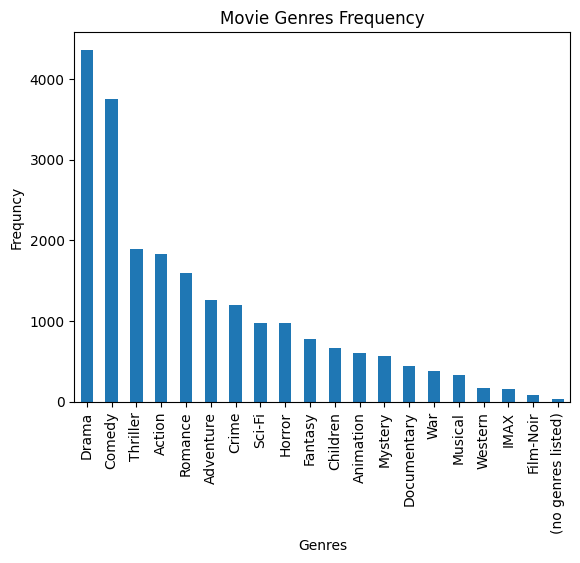

In [82]:
# To plot the movies genres using bar plot
movies_gen.plot(kind= 'bar', xlabel='Genres', ylabel='Frequncy', title='Movie Genres Frequency')
plt.show()

In [83]:
df_ratings.info() # 4 columns, 100836 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [84]:
df_ratings.describe().T # print summary of Statistics

,count,mean,std,min,25%,50%,75%,max
userId,100836.0,3.261276e+02,1.826185e+02,1.0,1.770000e+02,3.250000e+02,4.770000e+02,6.100000e+02
movieId,100836.0,1.943530e+04,3.553099e+04,1.0,1.199000e+03,2.991000e+03,8.122000e+03,1.936090e+05
rating,100836.0,3.501557e+00,1.042529e+00,0.5,3.000000e+00,3.500000e+00,4.000000e+00,5.000000e+00
timestamp,100836.0,1.205946e+09,2.162610e+08,828124615.0,1.019124e+09,1.186087e+09,1.435994e+09,1.537799e+09


### b) Vilka är de 10 filmerna med flest ratings?


In [85]:
# calculate the top 10 movies with most ratings
top10_movies_rating =df_ratings.groupby(by = 'movieId')['rating'].count().sort_values(ascending=False).head(10) 
print('Top 10 movie most rating are:' )
top10_movies_rating


Top 10 movie most rating are:


movieId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
Name: rating, dtype: int64

### c) Beräkna den genomsnittliga ratingen för dessa 10 filmerna med flest ratings.


In [86]:
# check the data for only top 10 movies with most ratings 
top_10_ratings = df_ratings.query('movieId in @top10_movies_rating.index ')
top_10_ratings

,userId,movieId,rating,timestamp
7,1,110,4.0,964982176
15,1,260,5.0,964981680
16,1,296,3.0,964982967
20,1,356,4.0,964980962
26,1,480,4.0,964982346
...,...,...,...,...
99569,610,480,5.0,1479545821
99571,610,527,3.5,1479545826
99573,610,589,5.0,1479542983
99575,610,593,4.5,1479545819


In [87]:
# caluclate the average mean value for those top 10 movies rating
top_10_mean_ratings = top_10_ratings.groupby('movieId')['rating'].mean()

print('The average mean value for top 10 movies rating are :')
round(top_10_mean_ratings,1)


The average mean value for top 10 movies rating are :


movieId
110     4.0
260     4.2
296     4.2
318     4.4
356     4.2
480     3.8
527     4.2
589     4.0
593     4.2
2571    4.2
Name: rating, dtype: float64

### d) Gör en plot över årtal och antalet filmer representerade i datasetet.

In [88]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [89]:
# extract the year from the title column
df_movies['year'] = df_movies['title'].str.extract(r'\((\d{4})\)')
df_movies.head()


,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [90]:
# count the number of movies per year
df_movies_per_year = df_movies.groupby(by='year')['movieId'].count()
df_movies_per_year

year
1902      1
1903      1
1908      1
1915      1
1916      4
       ... 
2014    278
2015    274
2016    218
2017    147
2018     41
Name: movieId, Length: 106, dtype: int64

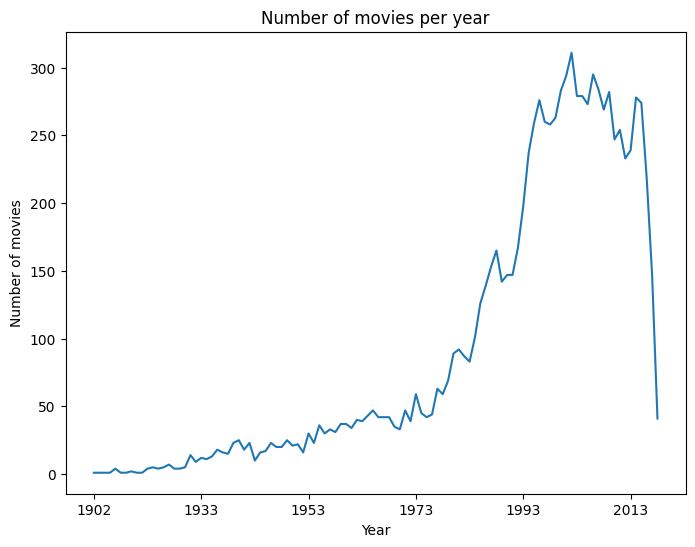

In [91]:

# Plot graphically
df_movies_per_year.plot(
    kind="line",
    xlabel="Year",
    ylabel="Number of movies",
    title="Number of movies per year",
    legend=False,figsize=(8, 6)
);


In [92]:
# split the title and year to separte column
df_movies[['title', 'year']] = df_movies['title'].str.split('(', n=1, expand=True) # https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html
df_movies.head(10)

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995)
1,2,Jumanji,Adventure|Children|Fantasy,1995)
2,3,Grumpier Old Men,Comedy|Romance,1995)
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995)
4,5,Father of the Bride Part II,Comedy,1995)
5,6,Heat,Action|Crime|Thriller,1995)
6,7,Sabrina,Comedy|Romance,1995)
7,8,Tom and Huck,Adventure|Children,1995)
8,9,Sudden Death,Action,1995)
9,10,GoldenEye,Action|Adventure|Thriller,1995)


In [93]:
df_movies['year']= df_movies['year'].str.strip(')') # to remove ')' in year column
df_movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [94]:
df_movies_per_year1 = df_movies.groupby(by='year')['movieId'].count()
#df_movies_per_year



### e) Gör en plot över antalet ratings mot movieId.

In [95]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [96]:
number_of_ratings = df_ratings.groupby(by='movieId')['rating'].count().reset_index()
number_of_ratings

,movieId,rating
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49
...,...,...
9719,193581,1
9720,193583,1
9721,193585,1
9722,193587,1


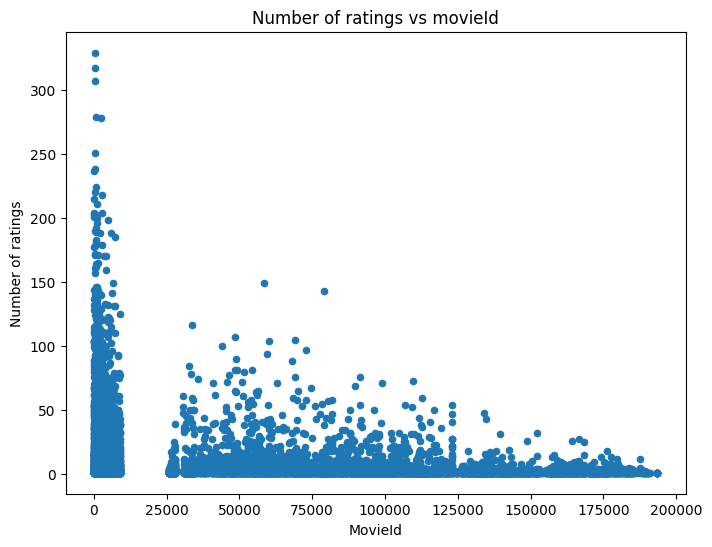

In [97]:

# Plot graphically
number_of_ratings.plot(
    kind="scatter",x="movieId",y="rating",
    xlabel="MovieId",
    ylabel="Number of ratings",
    title="Number of ratings vs movieId",
    legend=False,figsize=(8, 6)
);

### f) Beräkna genomsnittliga ratings för de top 10 filmerna med flest ratings. Gör ett stapeldiagram över dessa.


In [98]:
# top 10 movies with most ratings
top_10 = number_of_ratings.nlargest(10,columns='rating')
top_10

,movieId,rating
314,356,329
277,318,317
257,296,307
510,593,279
1938,2571,278
224,260,251
418,480,238
97,110,237
507,589,224
461,527,220


In [99]:
# To get movie names merge data
top_10_movie_title= pd.merge(top_10, df_movies, on='movieId')
top_10_movie_title

,movieId,rating,title,genres,year
0,356,329,Forrest Gump,Comedy|Drama|Romance|War,1994
1,318,317,"Shawshank Redemption, The",Crime|Drama,1994
2,296,307,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994
3,593,279,"Silence of the Lambs, The",Crime|Horror|Thriller,1991
4,2571,278,"Matrix, The",Action|Sci-Fi|Thriller,1999
5,260,251,Star Wars: Episode IV - A New Hope,Action|Adventure|Sci-Fi,1977
6,480,238,Jurassic Park,Action|Adventure|Sci-Fi|Thriller,1993
7,110,237,Braveheart,Action|Drama|War,1995
8,589,224,Terminator 2: Judgment Day,Action|Sci-Fi,1991
9,527,220,Schindler's List,Drama|War,1993


In [100]:
# check the data for only top 10 movies with most ratings 
top_10_ratings = df_ratings.query('movieId in @top_10_movie_title["movieId"]')
top_10_ratings

,userId,movieId,rating,timestamp
7,1,110,4.0,964982176
15,1,260,5.0,964981680
16,1,296,3.0,964982967
20,1,356,4.0,964980962
26,1,480,4.0,964982346
...,...,...,...,...
99569,610,480,5.0,1479545821
99571,610,527,3.5,1479545826
99573,610,589,5.0,1479542983
99575,610,593,4.5,1479545819


In [101]:
top_10_movie_title_ratings_avg= top_10_ratings.groupby(by='movieId')['rating'].mean()
top_10_movie_title_ratings_avg

movieId
110     4.031646
260     4.231076
296     4.197068
318     4.429022
356     4.164134
480     3.750000
527     4.225000
589     3.970982
593     4.161290
2571    4.192446
Name: rating, dtype: float64

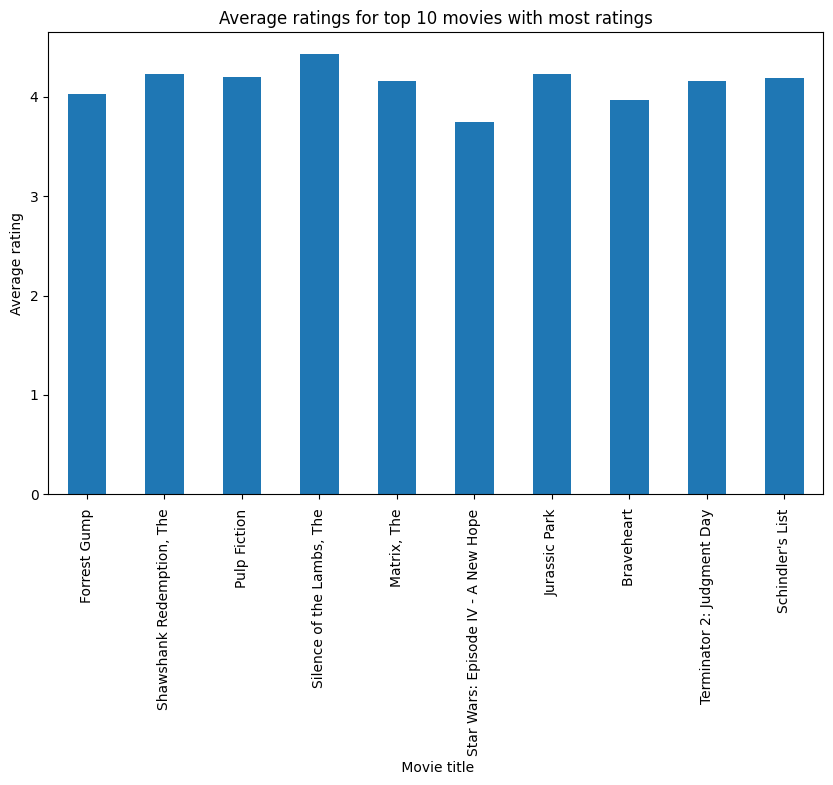

In [102]:
ax=top_10_movie_title_ratings_avg.plot(
    kind="bar",
    stacked=True,
    xlabel=" Movie title",
    ylabel="Average rating",
    title="Average ratings for top 10 movies with most ratings",
    figsize=(10, 6)
)
# Set the x-axis labels to the movie titles
ax.set_xticklabels(top_10_movie_title['title'])
plt.show()
